## **Práctica 6: Clustering Jerárquico (Segmentación de clientes)**

Nombre: Puente López Gandhi Yael

No. Cuenta: 315252884

Email: gandhi.puente@ingenieria.unam.edu

**Contexto**

**Objetivo.** Obtener clústeres de casos de usuarios, con características similares, evaluados para la adquisición de una casa a través de un crédito hipotecario con tasa fija a 30 años.

**Fuente de datos:**

* ingresos: son ingresos mensuales de 1 o 2 personas, si están casados.
* gastos_comunes: son gastos mensuales de 1 o 2 personas, si están casados. 
* pago_coche
* gastos_otros
* ahorros
* vivienda: valor de la vivienda.
* estado_civil: 0-soltero, 1-casado, 2-divorciado
* hijos: cantidad de hijos menores (no trabajan).
* trabajo: 0-sin trabajo, 1-autonomo, 2-asalariado, 3-empresario, 4-autonomos, 5-asalariados, 6-autonomo y asalariado, 7-empresario y autonomo, 8-empresarios o empresario y autónomo 
* comprar: 0-alquilar, 1-comprar casa a través de crédito hipotecario con tasa fija a 30 años.


#### **1) Importar las bibliotecas necesarias y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline 

In [3]:
Hipoteca = pd.read_csv("Hipoteca.csv")
Hipoteca 

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [4]:
Hipoteca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [5]:
print(Hipoteca.groupby('comprar').size()) 

comprar
0    135
1     67
dtype: int64


#### **2) Selección de características**

**Evaluación visual**

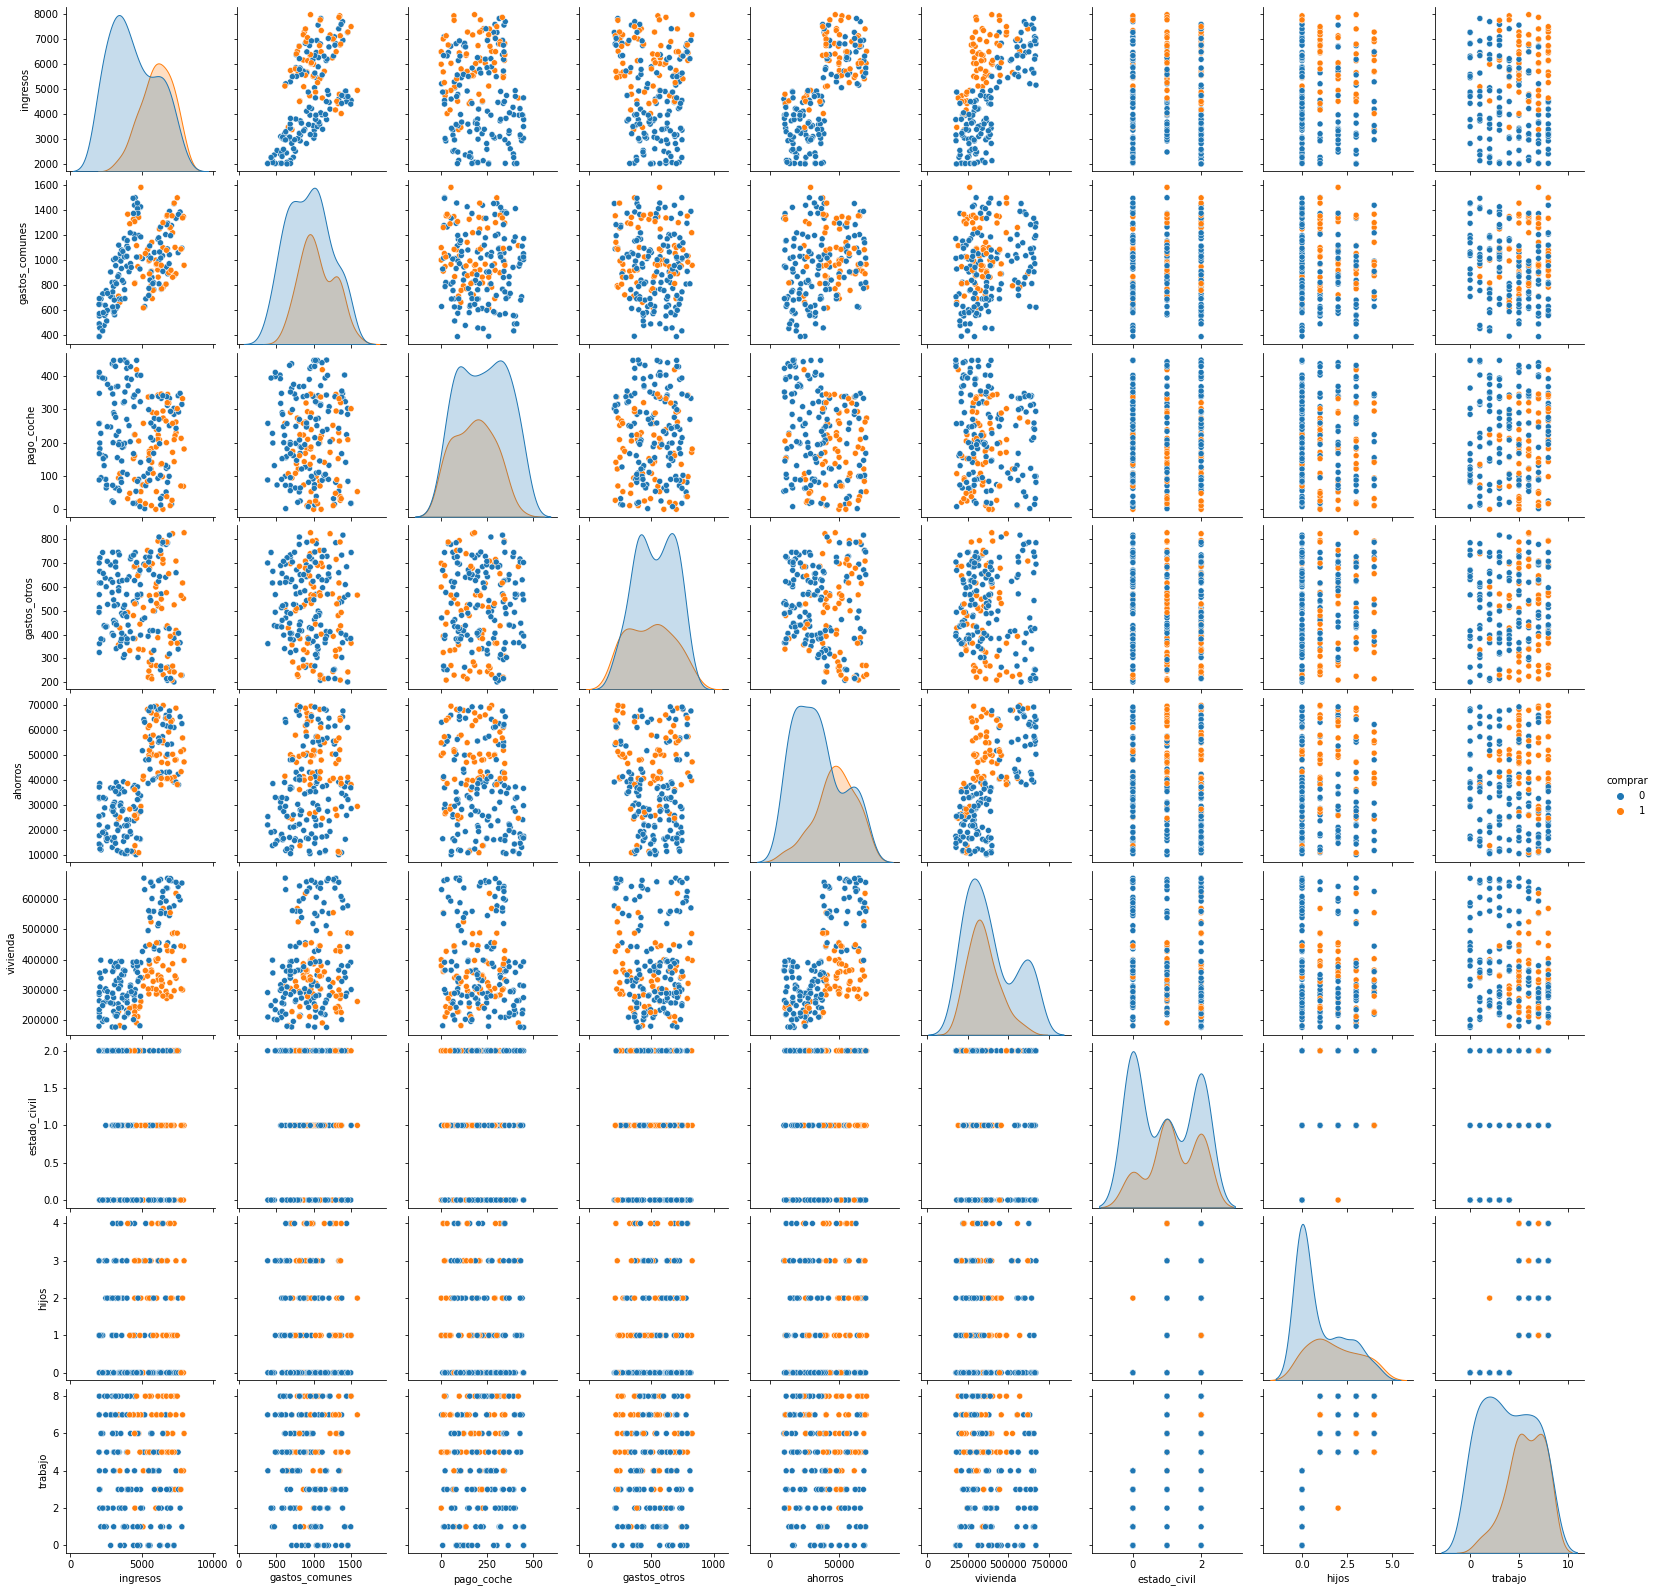

In [6]:
sns.pairplot(Hipoteca, hue='comprar')
plt.show() 

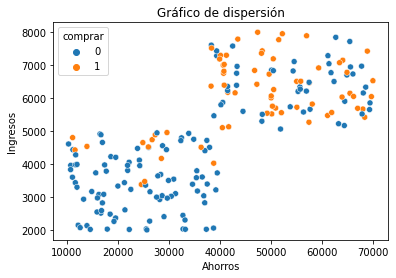

In [7]:
sns.scatterplot(x='ahorros', y ='ingresos', data=Hipoteca, hue='comprar')
plt.title('Gráfico de dispersión')
plt.xlabel('Ahorros')
plt.ylabel('Ingresos')
plt.show()

**Matriz de correlaciones**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [8]:
CorrHipoteca = Hipoteca.corr(method='pearson')
CorrHipoteca

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
ingresos,1.000000,0.560211,-0.109780,-0.124105,0.712889,0.614721,-0.042556,-0.024483,-0.038852,0.467123
gastos_comunes,0.560211,1.000000,-0.054400,-0.099881,0.209414,0.204781,-0.057152,-0.072321,-0.079095,0.200191
pago_coche,-0.109780,-0.054400,1.000000,0.010602,-0.193299,-0.094631,0.052239,-0.044858,0.018946,-0.196468
gastos_otros,-0.124105,-0.099881,0.010602,1.000000,-0.064384,-0.054577,-0.020226,0.124845,0.047313,-0.110330
ahorros,0.712889,0.209414,-0.193299,-0.064384,1.000000,0.605836,-0.063039,0.001445,-0.023829,0.340778
vivienda,0.614721,0.204781,-0.094631,-0.054577,0.605836,1.000000,-0.113420,-0.141924,-0.211790,-0.146092
estado_civil,-0.042556,-0.057152,0.052239,-0.020226,-0.063039,-0.113420,1.000000,0.507609,0.589512,0.142799
hijos,-0.024483,-0.072321,-0.044858,0.124845,0.001445,-0.141924,0.507609,1.000000,0.699916,0.272883
trabajo,-0.038852,-0.079095,0.018946,0.047313,-0.023829,-0.211790,0.589512,0.699916,1.000000,0.341537
comprar,0.467123,0.200191,-0.196468,-0.110330,0.340778,-0.146092,0.142799,0.272883,0.341537,1.000000


In [9]:
print(CorrHipoteca['ingresos'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores 

ingresos          1.000000
ahorros           0.712889
vivienda          0.614721
gastos_comunes    0.560211
comprar           0.467123
hijos            -0.024483
trabajo          -0.038852
estado_civil     -0.042556
pago_coche       -0.109780
gastos_otros     -0.124105
Name: ingresos, dtype: float64 



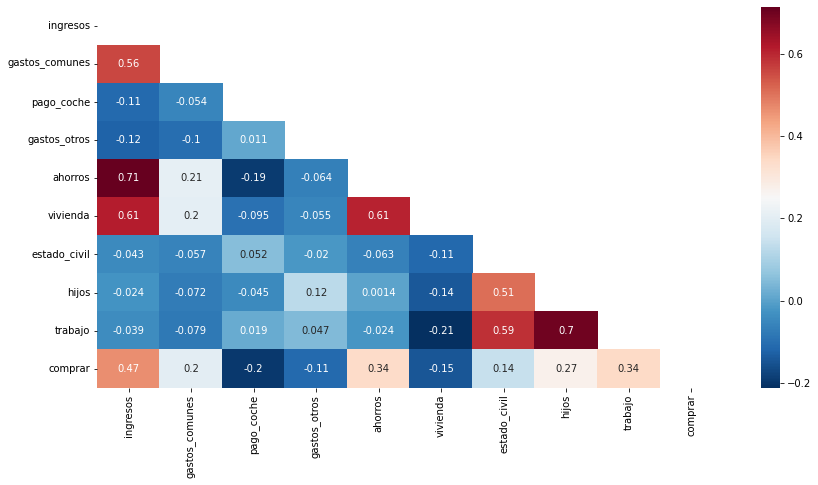

In [10]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrHipoteca)
sns.heatmap(CorrHipoteca, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Selección de variables:**

a) A pesar de existir 2 correlaciones altas, entre 'ingresos' y 'ahorros' (0.71) y 'trabajo' e 'hijos' (0.69);  éstas se tomarán en cuenta para obtener una segmentación que combine las variables mediante la similitud de los elementos.

b) Se suprimirá la variable 'comprar' debido a que representa inherentemente un agrupamiento, y fue un campo calculado con base a un análisis hipotecario preliminar.


In [11]:
MatrizHipoteca = np.array(Hipoteca[['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo']])
pd.DataFrame(MatrizHipoteca)
#MatrizHipoteca = Hipoteca.iloc[:, 0:9].values     #iloc para seleccionar filas y columnas según su posición
 

,0,1,2,3,4,5,6,7,8
0,6000,1000,0,600,50000,400000,0,2,2
1,6745,944,123,429,43240,636897,1,3,6
2,6455,1033,98,795,57463,321779,2,1,8
3,7098,1278,15,254,54506,660933,0,0,3
4,6167,863,223,520,41512,348932,0,0,3
...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2
198,3961,1030,270,475,21880,280421,2,3,8
199,3184,955,276,684,35565,388025,1,3,8
200,3334,867,369,652,19985,376892,1,2,5


#### **3) Aplicación del algoritmo**

Algoritmo: Jerárquico Ascendente 

Cuando se trabaja con clustering, dado que son algoritmos basados en distancias, es fundamental escalar los datos para que cada una de las variables contribuyan por igual en el análisis.

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()                               # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = estandarizar.fit_transform(MatrizHipoteca)   # Se calculan la media y desviación y se escalan los datos

In [13]:
pd.DataFrame(MEstandarizada) 

,0,1,2,3,4,5,6,7,8
0,0.620129,0.104689,-1.698954,0.504359,0.649475,0.195910,-1.227088,0.562374,-0.984420
1,1.063927,-0.101625,-0.712042,-0.515401,0.259224,1.937370,-0.029640,1.295273,0.596915
2,0.891173,0.226266,-0.912634,1.667244,1.080309,-0.379102,1.167809,-0.170526,1.387582
3,1.274209,1.128886,-1.578599,-1.559015,0.909604,2.114062,-1.227088,-0.903426,-0.589086
4,0.719611,-0.400042,0.090326,0.027279,0.159468,-0.179497,-1.227088,-0.903426,-0.589086
...,...,...,...,...,...,...,...,...,...
197,-0.671949,-1.037402,1.125381,-0.163554,-1.617963,-0.075199,-1.227088,-0.903426,-0.984420
198,-0.594508,0.215214,0.467439,-0.241079,-0.973876,-0.683130,1.167809,1.295273,1.387582
199,-1.057368,-0.061099,0.515581,1.005294,-0.183849,0.107880,-0.029640,1.295273,1.387582
200,-0.968013,-0.385305,1.261783,0.814462,-1.083273,0.026040,-0.029640,0.562374,0.201581


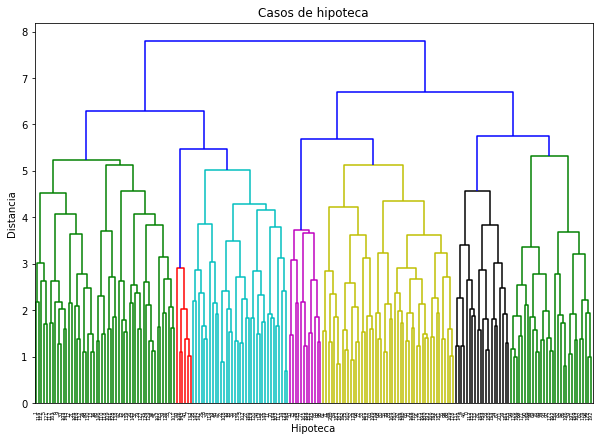

In [14]:
#Se importan las bibliotecas de clustering jerárquico para crear el árbol
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10, 7))
plt.title("Casos de hipoteca")
plt.xlabel('Hipoteca')
plt.ylabel('Distancia')
Arbol = shc.dendrogram(shc.linkage(MEstandarizada, method='complete', metric='euclidean'))
#plt.axhline(y=5.4, color='orange', linestyle='--')
#Probar con otras medciones de distancia (euclidean, chebyshev, cityblock)

In [15]:
#Se crean las etiquetas de los elementos en los clústeres
MJerarquico = AgglomerativeClustering(n_clusters=7, linkage='complete', affinity='euclidean')
MJerarquico.fit_predict(MEstandarizada)
MJerarquico.labels_

array([4, 1, 1, 2, 4, 1, 1, 6, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 4, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 6, 1, 1, 1,
       2, 2, 4, 2, 1, 6, 5, 3, 3, 3, 4, 3, 3, 0, 4, 0, 3, 3, 0, 3, 0, 3,
       3, 4, 3, 0, 3, 3, 3, 5, 0, 3, 0, 5, 5, 3, 3, 4, 0, 3, 3, 5, 0, 3,
       3, 0, 0, 3, 5, 0, 0, 5, 0, 0, 3, 0, 3, 1, 2, 1, 1, 2, 6, 1, 2, 1,
       1, 2, 4, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4,
       6, 4, 2, 4, 2, 1, 1, 1, 2, 1, 2, 1, 2, 6, 1, 1, 2, 4, 2, 4, 5, 4,
       4, 4, 0, 3, 3, 0, 3, 3, 3, 1, 3, 5, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 4, 5, 0, 3, 4, 0, 3, 0, 0, 3, 3, 5, 0, 0,
       5, 3, 3, 4])

In [16]:
Hipoteca = Hipoteca.drop(columns=['comprar'])
Hipoteca['clusterH'] = MJerarquico.labels_
Hipoteca 

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,clusterH
0,6000,1000,0,600,50000,400000,0,2,2,4
1,6745,944,123,429,43240,636897,1,3,6,1
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,2
4,6167,863,223,520,41512,348932,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,5
199,3184,955,276,684,35565,388025,1,3,8,3
200,3334,867,369,652,19985,376892,1,2,5,3


In [17]:
#Cantidad de elementos en los clusters
Hipoteca.groupby(['clusterH'])['clusterH'].count() 

clusterH
0    30
1    51
2    35
3    48
4    20
5    12
6     6
Name: clusterH, dtype: int64

In [18]:
Hipoteca[Hipoteca.clusterH == 6]

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,clusterH
7,6470,1035,39,782,57439,606291,0,0,1,6
40,6822,1296,81,786,50433,669054,0,0,0,6
49,6959,1392,333,818,67714,571076,0,0,3,6
106,6205,1179,240,729,56904,661009,0,0,2,6
132,6325,1139,102,754,68527,588004,0,0,0,6
145,5646,1016,215,747,69276,655399,0,0,1,6


In [19]:
CentroidesH = Hipoteca.groupby('clusterH').mean()
CentroidesH

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
clusterH,,,,,,,,,
0,3421.133333,846.466667,309.933333,527.233333,24289.633333,295590.700000,0.233333,0.000000,2.000000
1,6394.019608,1021.627451,192.274510,533.039216,54382.529412,421178.764706,1.490196,2.254902,6.313725
2,6599.542857,1087.428571,204.771429,362.600000,51863.028571,515494.257143,0.685714,0.228571,2.885714
3,3189.687500,785.020833,243.208333,548.270833,23616.854167,277066.687500,1.645833,1.979167,6.208333
4,4843.750000,1009.200000,122.200000,572.850000,36340.650000,337164.850000,0.050000,0.100000,1.900000
5,4466.416667,1315.083333,114.416667,502.750000,23276.166667,269429.916667,1.666667,2.416667,6.750000
6,6404.500000,1176.166667,168.333333,769.333333,61715.500000,625138.833333,0.000000,0.000000,1.166667


**Clúster 0:** Conformado por 30 casos de una evaluación hipotecaría, con un ingreso promedio mensual de 3421 USD, con gastos comunes de 846 USD, otros gastos de 527 USD y un pago mensual de coche de 309 USD. Estos gastos en promedio representan casi la mitad del salario mensual (1682 USD). Por otro lado, este grupo de usuarios tienen un ahorro promedio de 24289 USD, y un valor promedio de vivienda (a comprar o hipotecar) de 295590 USD. Además, en su mayoría son solteros (0-soltero), sin hijos menores y tienen un tipo de trabajo asalariado (2-asalariado).

...

**Clúster 6:** Es un segmento de clientes conformado por solo 6 usuarios, con un ingreso promedio mensual de 6404 USD, con gastos comunes de 1176 USD, otros gastos de 769 USD y un pago mensual de coche de 168 USD. Estos gastos en promedio representan casi una tercera parte del salario mensual (2113 USD). Por otro lado, este grupo de usuarios tienen un ahorro promedio de 61715 USD, y un valor promedio de vivienda (a comprar o hipotecar) de 625138 USD. Además, todos son solteros (0-soltero), sin hijos y tienen un tipo de trabajo en su mayoría autónomos (1-autónomo).

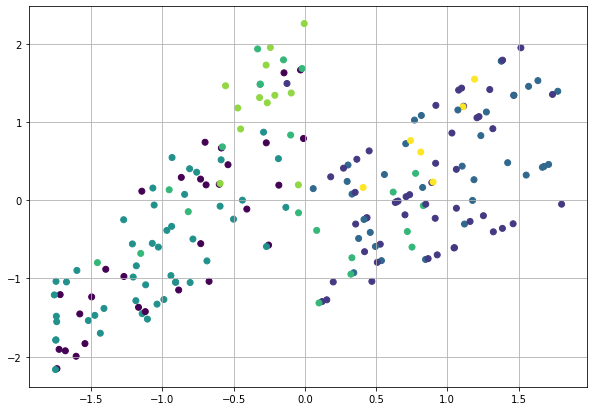

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(MEstandarizada[:,0], MEstandarizada[:,1], c=MJerarquico.labels_)
plt.grid()
plt.show() 